## Setup the environment

In [1]:
from llmselector.data_utils import DataLoader_SimpleQA
from llmselector.compoundai.module.debate import MultiAgentDebate
from llmselector.compoundai.metric import Metric, compute_score
from llmselector.compoundai.optimizer import OptimizerFullSearch, OptimizerLLMDiagnoser
import llmselector, os
import os
if not os.path.exists('../cache/db_simpleqa.sqlite'): 
    !wget -P ../cache https://github.com/LLMSELECTOR/LLMSELECTOR/releases/download/0.0.1/db_simpleqa.sqlite

In [2]:
llmselector.config.config(
    db_path=f"../cache/db_simpleqa.sqlite" ,
    openai_api_key="YOUR_OPENAI_KEY",
	anthropic_api_key="YOUR_ANTHROPIC_KEY",
	together_ai_api_key="YOUR_TOGETHERAI_KEY",
	gemini_api_key="YOUR_GEMINI_KEY")

## 1. Load dataset

In [3]:
from sklearn.model_selection import train_test_split
Mydataloader = DataLoader_SimpleQA()
q_data = Mydataloader.get_query_df()
train_df, test_df = train_test_split(q_data,test_size=0.5, random_state=2024)

## 2. Specify model and eval metric

In [4]:
model_list = ['gpt-4o-2024-05-13','gpt-4-turbo-2024-04-09','gpt-4o-mini-2024-07-18',
              'claude-3-5-sonnet-20240620','claude-3-haiku-20240307',
              'gemini-1.5-pro','gemini-1.5-flash',
              'meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo','meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo','Qwen/Qwen2.5-72B-Instruct-Turbo']
M1 = Metric('em_direct')

## 3. Standard systems using one fixed model

In [5]:
Agents_SameModel ={}
for name in model_list:
    Agents_SameModel[name] = MultiAgentDebate()
    Opt0 = OptimizerFullSearch(model_list = [name])
    Opt0.optimize( train_df, M1, Agents_SameModel[name])

100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.57s/it]


('gpt-4o-2024-05-13', 'gpt-4o-2024-05-13', 'gpt-4o-2024-05-13', 'gpt-4o-2024-05-13', 'gpt-4o-2024-05-13', 'gpt-4o-2024-05-13', 'gpt-4o-2024-05-13')


100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.02s/it]


('gpt-4-turbo-2024-04-09', 'gpt-4-turbo-2024-04-09', 'gpt-4-turbo-2024-04-09', 'gpt-4-turbo-2024-04-09', 'gpt-4-turbo-2024-04-09', 'gpt-4-turbo-2024-04-09', 'gpt-4-turbo-2024-04-09')


100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.29s/it]


('gpt-4o-mini-2024-07-18', 'gpt-4o-mini-2024-07-18', 'gpt-4o-mini-2024-07-18', 'gpt-4o-mini-2024-07-18', 'gpt-4o-mini-2024-07-18', 'gpt-4o-mini-2024-07-18', 'gpt-4o-mini-2024-07-18')


100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.43s/it]


('claude-3-5-sonnet-20240620', 'claude-3-5-sonnet-20240620', 'claude-3-5-sonnet-20240620', 'claude-3-5-sonnet-20240620', 'claude-3-5-sonnet-20240620', 'claude-3-5-sonnet-20240620', 'claude-3-5-sonnet-20240620')


100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.60s/it]


('claude-3-haiku-20240307', 'claude-3-haiku-20240307', 'claude-3-haiku-20240307', 'claude-3-haiku-20240307', 'claude-3-haiku-20240307', 'claude-3-haiku-20240307', 'claude-3-haiku-20240307')


100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.27s/it]


('gemini-1.5-pro', 'gemini-1.5-pro', 'gemini-1.5-pro', 'gemini-1.5-pro', 'gemini-1.5-pro', 'gemini-1.5-pro', 'gemini-1.5-pro')


100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.16s/it]


('gemini-1.5-flash', 'gemini-1.5-flash', 'gemini-1.5-flash', 'gemini-1.5-flash', 'gemini-1.5-flash', 'gemini-1.5-flash', 'gemini-1.5-flash')


100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.40s/it]


('meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo', 'meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo', 'meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo', 'meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo', 'meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo', 'meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo', 'meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo')


100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.16s/it]


('meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo', 'meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo', 'meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo', 'meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo', 'meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo', 'meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo', 'meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo')


100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.11s/it]

('Qwen/Qwen2.5-72B-Instruct-Turbo', 'Qwen/Qwen2.5-72B-Instruct-Turbo', 'Qwen/Qwen2.5-72B-Instruct-Turbo', 'Qwen/Qwen2.5-72B-Instruct-Turbo', 'Qwen/Qwen2.5-72B-Instruct-Turbo', 'Qwen/Qwen2.5-72B-Instruct-Turbo', 'Qwen/Qwen2.5-72B-Instruct-Turbo')


## 4. LLMSELECTOR

In [6]:
LLMSELECTOR = MultiAgentDebate()
Optimizer = OptimizerLLMDiagnoser(model_list = model_list)
Optimizer.optimize( train_df.head(500), M1, LLMSELECTOR) # use only 500 samples for fast processing

100%|█████████████████████████████████████████| 500/500 [00:11<00:00, 43.57it/s]


## 5. Performance evaluation

In [7]:
All_systems = {"LLMSELECTOR": LLMSELECTOR, **Agents_SameModel}
results = compute_score(All_systems, test_df, M1)
display("test accuracy",results)

100%|████████████████████████████████████| 2163/2163 [00:00<00:00, 95624.51it/s]


'test accuracy'

,Name,Mean_Score
0,LLMSELECTOR,0.276006
1,gpt-4o-2024-05-13,0.201572
2,gpt-4-turbo-2024-04-09,0.160425
3,gpt-4o-mini-2024-07-18,0.050393
4,claude-3-5-sonnet-20240620,0.202959
5,claude-3-haiku-20240307,0.078132
6,gemini-1.5-pro,0.158576
7,gemini-1.5-flash,0.054092
8,meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo,0.213130
9,meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo,0.121128


## 6. Visualization

In [8]:
import plotly.express as px

def visualize_scores(dataframe):
    """
    Visualizes the Mean Scores of models in a given dataframe using Plotly.

    Args:
    - dataframe (pd.DataFrame): DataFrame containing 'Name' and 'Mean_Score' columns.

    Returns:
    - A Plotly bar chart figure.
    """
    fig = px.bar(
        dataframe,
        x="Name",
        y="Mean_Score",
        title="Mean Scores of Models",
        labels={"Name": "Model Name", "Mean_Score": "Mean Score"},
        text="Mean_Score",
    )
    fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
    fig.update_layout(
        xaxis=dict(title="Model Name", tickangle=45),
        yaxis=dict(title="Mean Score"),
        margin=dict(l=40, r=40, t=40, b=100),
        height=800,
    )
    return fig

In [9]:
name_map = {'gpt-4o-2024-05-13': 'GPT-4o', 
            'gpt-4-turbo-2024-04-09': 'GPT-4 Turbo', 
           'meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo': 'Llama 3.1 405B',
           'meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo': 'Llama 3.1 70B',            
           'Qwen/Qwen2.5-72B-Instruct-Turbo': 'Qwen 2.5 72B',
          }
results['Name'] = results['Name'].replace(name_map)

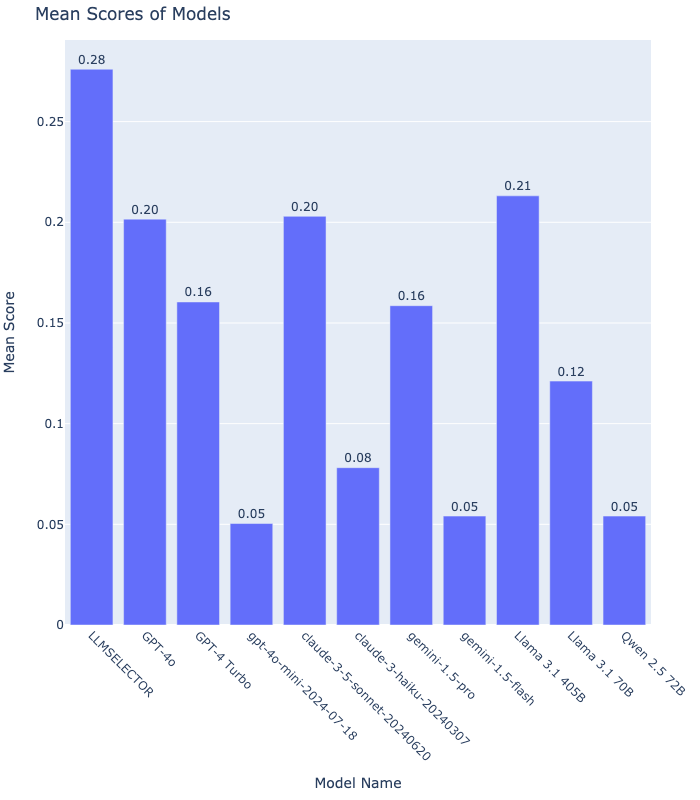

In [10]:
visualize_scores(results).show(renderer="png")

## 7. Example Deepdive

In [11]:
# Select questions on which LLMSELECTOR is correct but other models are wrong
model1 = 'meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo'
model2 = 'claude-3-5-sonnet-20240620'
example_df = test_df[
(test_df['score_LLMSELECTOR']==1) &
(test_df[f'score_{model1}']==0)
& (test_df[f'score_{model2}']==0)]

In [12]:
index = 1
query = example_df.iloc[index]['query']
answer = example_df.iloc[index]['true_answer']
print(f"question: {query}\nanswer: {answer}")

question: On what day, month, and year was Richard Evelyn Byrd Jr. promoted to the rank of Lieutenant (Junior Grade)?
answer: June 8, 1915


In [13]:
Agents_SameModel[model1].generate(query)
Agents_SameModel[model1].load_history()['trace']

[['meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo', '(2 June 1916)'],
 ['meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo', '(2 June 1916)'],
 ['meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo', '(2 June 1916)'],
 ['meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo',
  'After examining the solutions from other agents, I found that all agents provided the same answer: (2 June 1916). This suggests a consensus among the agents regarding the date Richard Evelyn Byrd Jr. was promoted to the rank of Lieutenant (Junior Grade).\n\nGiven the consistency of the responses, I conclude that the information is likely accurate. Therefore, I will retain my original answer.\n\n(2 June 1916)'],
 ['meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo',
  'After examining the solutions from other agents, I found that all agents provided the same answer: (2 June 1916). This suggests a consensus among the agents regarding the date Richard Evelyn Byrd Jr. was promoted to the rank of Lieutenant (Junior Grade).\n\nGiven the co

In [14]:
Agents_SameModel[model2].generate(query)
Agents_SameModel[model2].load_history()['trace']

[['claude-3-5-sonnet-20240620',
  "I apologize, but I don't have the exact date of Richard Evelyn Byrd Jr.'s promotion to Lieutenant (Junior Grade) in my database. Naval promotions are often not as widely documented as other career milestones. Without access to his official military records, I cannot provide a specific day, month, and year for this promotion with certainty. Therefore, I cannot format a precise answer as requested.\n\n(Unable to determine)"],
 ['claude-3-5-sonnet-20240620',
  'Based on my research, Richard Evelyn Byrd Jr. was promoted to the rank of Lieutenant (Junior Grade) on June 2, 1910. Therefore, the concise answer formatted as requested is:\n\n(June 2, 1910)'],
 ['claude-3-5-sonnet-20240620',
  'Based on my research, Richard Evelyn Byrd Jr. was promoted to the rank of Lieutenant (Junior Grade) on June 2, 1910. Therefore, the concise answer formatted as requested is:\n\n(June 2, 1910)'],
 ['claude-3-5-sonnet-20240620',
  "Thank you for providing the additional inf

In [15]:
LLMSELECTOR.generate(query)
LLMSELECTOR.load_history()['trace']

[['claude-3-5-sonnet-20240620',
  "I apologize, but I don't have the exact date of Richard Evelyn Byrd Jr.'s promotion to Lieutenant (Junior Grade) in my database. Naval promotions are often not as widely documented as other career milestones. Without access to his official military records, I cannot provide a specific day, month, and year for this promotion with certainty. Therefore, I cannot format a precise answer as requested.\n\n(Unable to determine)"],
 ['gpt-4o-2024-05-13',
  '(Richard Evelyn Byrd Jr. was promoted to the rank of Lieutenant (Junior Grade) on June 8, 1915).'],
 ['meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo', '(2 June 1916)'],
 ['gpt-4o-2024-05-13',
  "Based on the responses from the other agents, there is a discrepancy in the dates provided for Richard Evelyn Byrd Jr.'s promotion to Lieutenant (Junior Grade). Agent 0 states June 8, 1915, while Agent 1 states June 2, 1916. Given the conflicting information, I would need to verify the correct date from a reliable 